In [33]:
from mnist import MNIST
import numpy as np
from scipy import linalg
import random
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import torch

import os


In [42]:
mndata = MNIST('./data/')
x_train, y_train = map(np.array, mndata.load_training())
x_test, y_test = map(np.array, mndata.load_testing())
x_train = x_train/255.0
x_test = x_test/255.0
y_train = y_train.reshape(y_train.shape[0],1)
y_test = y_test.reshape(y_test.shape[0],1)

In [43]:
u = np.mean(x_train, axis = 0).reshape(x_train.shape[1],1)
SIGMA = ((x_train-u.T).T.dot(x_train-u.T))/60000
s = np.linalg.eig(SIGMA)

In [44]:
print('L1 is {}'.format(s[0][0]))
print('L2 is {}'.format(s[0][1]))
print('L10 is {}'.format(s[0][9]))
print('L30 is {}'.format(s[0][29]))
print('L50 is {}'.format(s[0][49]))

L1 is (5.116787728342082+0j)
L2 is (3.7413284788648284+0j)
L10 is (1.242729376417328+0j)
L30 is (0.3642557202788906+0j)
L50 is (0.16970842700672717+0j)


In [39]:
sum_L = np.sum(s[0])
print('sum_L is {}'.format(sum_L))

sum_L is 3428445.4330706326


In [19]:
def reconstruction_error(k,x_train,x_test):
    u = np.mean(x_train, axis = 0).reshape(x_train.shape[1],1)
    SIGMA = ((x_train-u.T).T.dot(x_train-u.T))/60000
    eigenvalue, eigenvectors = np.linalg.eig(SIGMA)
    eigenvectors = eigenvectors[:,np.argsort(-eigenvalue)]
    eigenvalue = eigenvalue[np.argsort(-eigenvalue)]
    V = eigenvectors[:,0] .reshape(x_train.shape[1],1)
    for i in range(1,k):
        col = eigenvectors[:,i].reshape(x_train.shape[1],1)
        V = np.concatenate((V, col),axis = 1)
        #print(V.shape)
    m_train = (x_train-u.T).T-V.dot(V.T).dot((x_train-u.T).T)
    print(m_train.shape)
    print((np.linalg.norm(m_train,axis = 0)**2).shape)
    recon_error_train = np.mean(np.linalg.norm(m_train,axis = 0)**2)
    m_test = (x_test-u.T).T-V.dot(V.T).dot((x_test-u.T).T)
    recon_error_test = np.mean(np.linalg.norm(m_test,axis = 0)**2)
    print("k: {}, reconstruction_error_train: {}".format(k,recon_error_train))
    print("k: {}, reconstruction_error_test: {}".format(k,recon_error_test))
    return recon_error_train, recon_error_test
    
    

In [24]:
reconstruction_error(1,x_train,x_test)

(784, 60000)
(60000,)
k: 1, reconstruction_error_train: 3095726.3110351786
k: 1, reconstruction_error_test: 3096165.8328274926


(3095726.3110351786, 3096165.8328274926)

In [4]:
def plot_c1(x_train, x_test,k):
    recon_error_train_list = []
    recon_error_test_list = []
    for i in range(1, k+1):
        recon_error_train, recon_error_test = reconstruction_error(i,x_train,x_test)
        recon_error_train_list.append(recon_error_train)
        recon_error_test_list.append(recon_error_test)
    plt.clf()
    plt.plot(range(1,k+1),recon_error_train_list,'-',label='training')
    plt.plot(range(1,k+1),recon_error_test_list,'-',label='test')
    plt.legend()
    plt.xlabel('k-number of eigenvectors')
    plt.ylabel('Reconstruction error')
    plt.savefig('./a6c1.png',bbox_inches='tight')

In [40]:
def plot_c2(x,k):
    u = np.mean(x, axis = 0).reshape(x.shape[1],1)
    SIGMA = ((x-u.T).T.dot(x-u.T))/60000
    eigenvalue, eigenvectors = np.linalg.eig(SIGMA)
    eigenvalue = eigenvalue[np.argsort(-eigenvalue)]
    y_list = []
    for i in range(1,k+1):
        y = 1-np.sum(eigenvalue[:i])/np.sum(eigenvalue)
        y_list.append(y)
    plt.clf()
    plt.plot(range(1,k+1),y_list,'-')
    plt.xlabel('k-number of eigenvectors')
    plt.ylabel('y')
    plt.savefig('./a6c2.png',bbox_inches='tight')

In [ ]:
plot_c1(x_train,x_test,100)

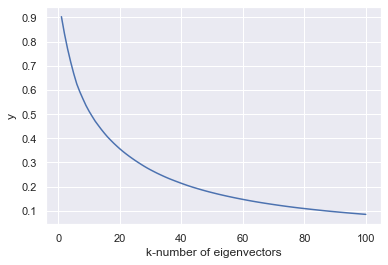

In [41]:
plot_c2(x_train,100)

In [7]:
#d. display the first 10 eigenvectors:
def a6d(x,k):
    u = np.mean(x, axis = 0).reshape(x.shape[1],1)
    SIGMA = ((x-u.T).T.dot(x-u.T))/60000
    eigenvalue, eigenvectors = np.linalg.eig(SIGMA)
    #eigenvectors = eigenvectors[:,np.argsort(-eigenvalue)]
    #eigenvalue = eigenvalue[np.argsort(-eigenvalue)]
    V = eigenvectors[:,0] .reshape(x_train.shape[1],1)
    for i in range(1,10):
        col = eigenvectors[:,i].reshape(x_train.shape[1],1)
        V = np.concatenate((V, col),axis = 1)
    fig = plt.figure()
    for i in range(0,10):
        cur_ax = fig.add_subplot(2, 5, i+1)
        sns.heatmap(V[:,i].reshape((28,28)), cbar=False, ax=cur_ax)
        cur_ax.get_xaxis().set_visible(False)
        cur_ax.get_yaxis().set_visible(False)
        cur_ax.set_title('eigenvector{}'.format(i+1),fontsize=9)
    plt.savefig("./a6d.png")

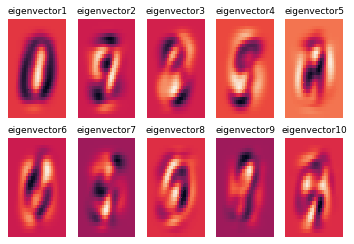

In [8]:
a6d(x_train,10)

In [29]:
def reconstruct(x, k_list,number):
    u = np.mean(x, axis = 0).reshape(x.shape[1],1)
    SIGMA = ((x-u.T).T.dot(x-u.T))/60000
    eigenvalue, eigenvectors = np.linalg.eig(SIGMA)
    eigenvectors = eigenvectors[:,np.argsort(-eigenvalue)]
    eigenvalue = eigenvalue[np.argsort(-eigenvalue)]
    result = np.where(y_train == number)
    x_i = x_train[result[0][0]].reshape(x.shape[1],1)
    fig = plt.figure()
    sns.set()
    cur_ax = fig.add_subplot(1, 1,1)
    sns.heatmap(x_i.reshape((28,28)), cbar=False, ax=cur_ax)
    cur_ax.get_xaxis().set_visible(False)
    cur_ax.get_yaxis().set_visible(False)
    cur_ax.set_title('number = {}'.format(number),fontsize=9)
    plt.savefig("./a6d_number{}.png".format(number))
    #k_list = [5,15,40,100]
    x_recon_list = []
    for k in k_list:
        V = eigenvectors[:,0].reshape(x_train.shape[1],1)
        for i in range(1,k):
            col = eigenvectors[:,i].reshape(x_train.shape[1],1)
            V = np.concatenate((V, col),axis = 1)
        x_recon = V.dot(V.T).dot(x_i-u)+u
        x_recon_list.append(x_recon)
    fig = plt.figure()
    for i in range(0,len(k_list)):
        sns.set()
        cur_ax = fig.add_subplot(2, 2, i+1)
        sns.heatmap(x_recon_list[i].reshape((28,28)), cbar=False, ax=cur_ax)
        cur_ax.get_xaxis().set_visible(False)
        cur_ax.get_yaxis().set_visible(False)
        cur_ax.set_title('k = {}'.format(k_list[i]),fontsize=9)
        plt.savefig("./a6dr{}.png".format(number))

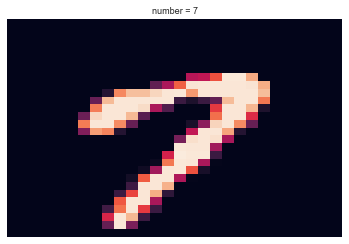

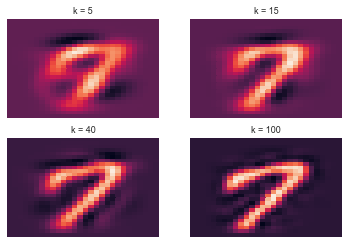

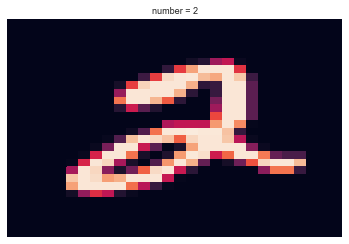

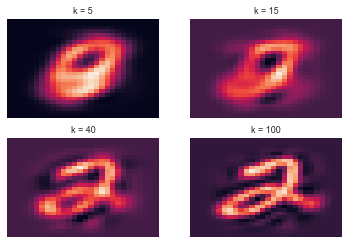

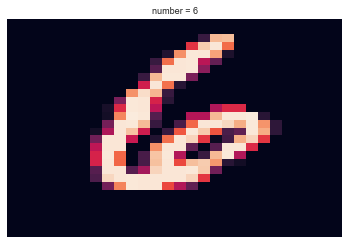

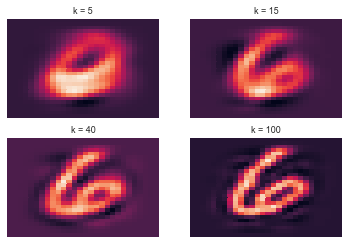

In [30]:
reconstruct(x_train,[5,15,40,100] ,7)
reconstruct(x_train,[5,15,40,100] ,2)
reconstruct(x_train,[5,15,40,100] ,6)


In [46]:
reconstruction_error(0,x_train,x_test)

(784, 60000)
(60000,)
k: 0, reconstruction_error_train: 47.60824776678476
k: 0, reconstruction_error_test: 47.61500704079213


(47.60824776678476, 47.61500704079213)

In [48]:
u = np.mean(x_train, axis = 0).reshape(x_train.shape[1],1)
SIGMA = ((x_train-u.T).T.dot(x_train-u.T))/60000
eigenvalue, eigenvectors = np.linalg.eig(SIGMA)
eigenvectors = eigenvectors[:,np.argsort(-eigenvalue)]
eigenvalue = eigenvalue[np.argsort(-eigenvalue)]

m_train = (x_train-u.T).T
print(m_train.shape)
print(np.mean(np.linalg.norm(m_train,axis = 0)**2))


(784, 60000)
52.72503549512683


In [ ]:
d = np.array([3,2,4])

In [ ]:
c = c[:,np.argsort(-d)]

In [ ]:
newc = c[np.argsort(-d)]

In [50]:
np.arange(0,1,0.001).shape

(1000,)

In [ ]:
newc